# FINAL CAPSTONE PROJECT

## Reading Train Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [4]:
df.tail()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
15725,16554,Women Maroon Heels Sandal,4.3,Women,Flipkart,567,1199,52.71%,807.0,114.0,485.0,177.0,61.0,41,43,0
15726,19600,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499,998,50.00%,246.0,34.0,120.0,45.0,37.0,16,28,1
15727,6733,Women Navy Flats Sandal,3.7,Women,Flipkart,329,499,34.07%,NaN,18.0,NaN,NaN,20.0,10,15,1
15728,3889,Red Chief Men's Sneakers,3.9,Men,Amazon,2249,4499,50.01%,750.0,479.0,13.0,6.0,10.0,25,47,1
15729,13682,Slip On For Men (Brown),5.0,Men,Flipkart,1539,2799,45.02%,8.0,1.0,8.0,0.0,0.0,0,0,1


In [5]:
df.shape

(15730, 16)

In [6]:
df.dtypes

id              int64
title          object
Rating        float64
maincateg      object
platform       object
price1          int64
actprice1       int64
Offer %        object
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
dtype: object

In [7]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [8]:
df.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


## Filling NaN Values

In [9]:
for i in range(df.shape[0]):
    if ('Men' in df['title'][i]) and pd.isnull(df['maincateg'][i]):
        df['maincateg']=df['maincateg'].fillna('Men')
    elif ('Women' in df['title'][i]) and pd.isnull(df['maincateg'][i]):
        df['maincateg']=df['maincateg'].fillna('Women')

In [10]:
df['norating1']=df['norating1'].fillna(df['norating1'].median())
df['noreviews1']=df['noreviews1'].fillna(df['noreviews1'].median())
df['star_5f']=df['star_5f'].fillna(df['star_5f'].median())
df['star_4f']=df['star_4f'].fillna(df['star_4f'].median())
df['star_3f']=df['star_3f'].fillna(df['star_3f'].median())

In [11]:
df.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [12]:
df.drop('Offer %',axis=1,inplace=True)

In [13]:
df.shape

(15730, 15)

In [14]:
df.title.nunique()

4782

In [15]:
df.drop('title',axis=1,inplace=True)

In [16]:
df.shape

(15730, 14)

<AxesSubplot:>

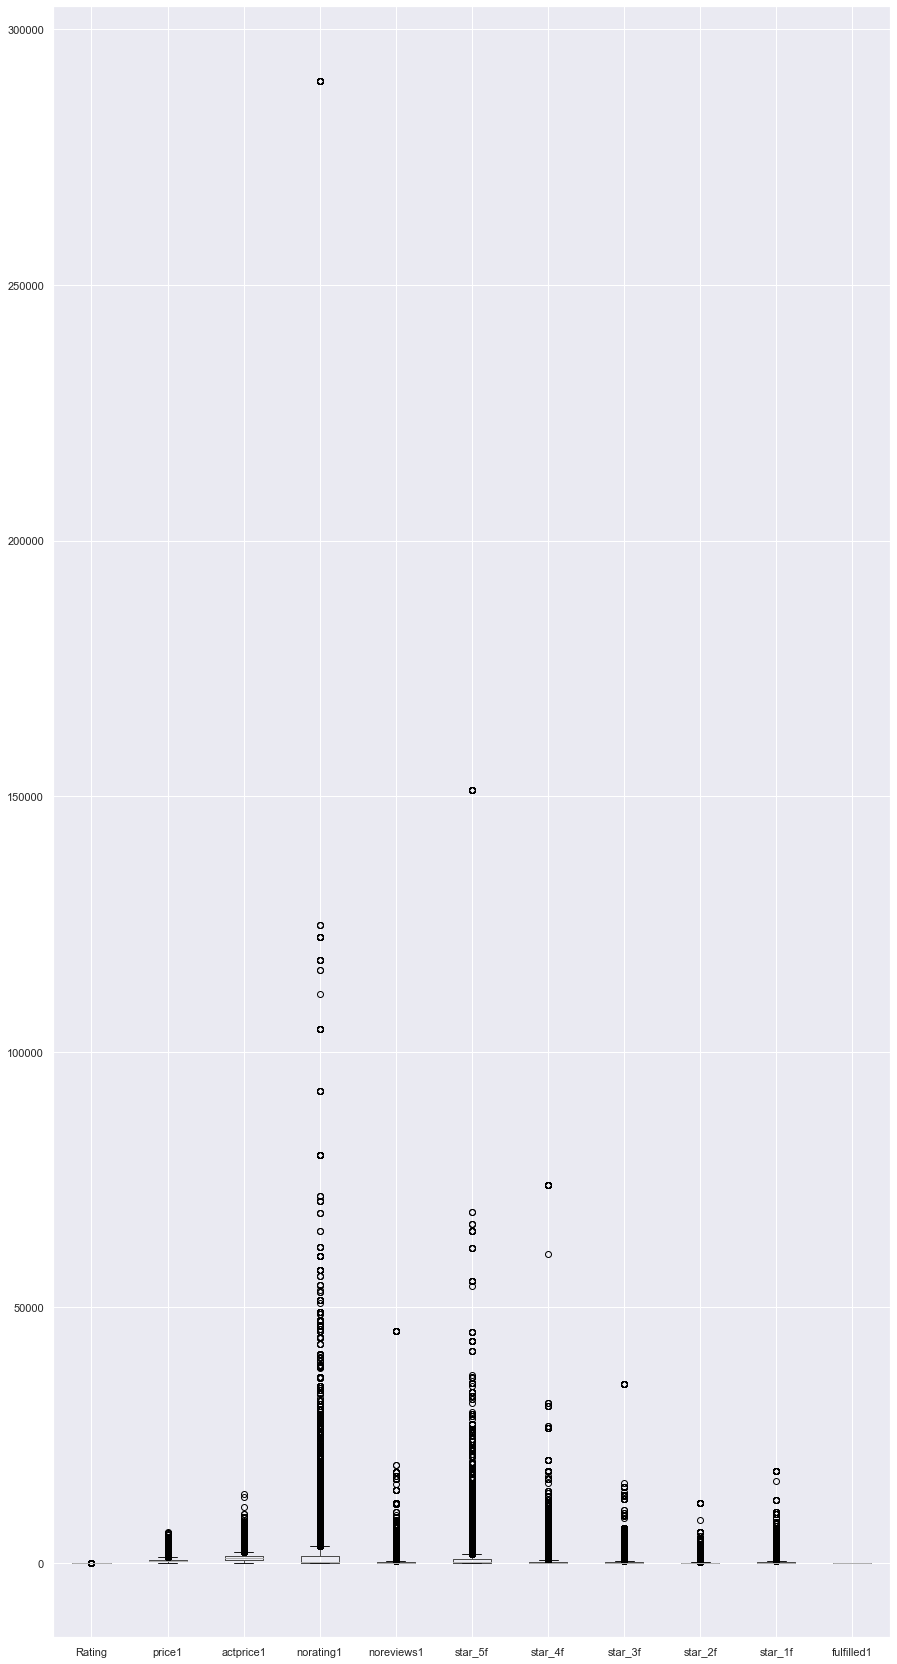

In [17]:
sns.set(rc={'figure.figsize':(15,30)})
df.boxplot(column=['Rating','price1','actprice1','norating1','noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f','fulfilled1'])
                    

## Scaling Numerical Data using Robust Scaler and encoding Categorical Columns using OneHotEncoder

In [18]:
numerical_cols=['id','Rating','price1','actprice1','norating1','noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f','fulfilled1']
categorical_cols=['maincateg','platform']
cols=[col for col in df.columns if col not in ['price1']]

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder

In [20]:
X=df.drop('price1',axis=1)
y=df.price1

In [21]:
X

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,3.9,Women,Flipkart,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,3.8,Men,Flipkart,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,4.4,Women,Flipkart,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,4.2,Men,Flipkart,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,3.9,Men,Flipkart,2299,77.0,3.0,35.0,21.0,7.0,7,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,16554,4.3,Women,Flipkart,1199,807.0,114.0,485.0,177.0,61.0,41,43,0
15726,19600,3.9,Women,Flipkart,998,246.0,34.0,120.0,45.0,37.0,16,28,1
15727,6733,3.7,Women,Flipkart,499,308.0,18.0,150.0,60.0,20.0,10,15,1
15728,3889,3.9,Men,Amazon,4499,750.0,479.0,13.0,6.0,10.0,25,47,1


In [22]:
X.shape

(15730, 13)

In [23]:
y

0         698
1         999
2        2749
3         518
4        1379
         ... 
15725     567
15726     499
15727     329
15728    2249
15729    1539
Name: price1, Length: 15730, dtype: int64

In [24]:
column_trans=make_column_transformer((OneHotEncoder(),categorical_cols),remainder='passthrough')

In [25]:
X=column_trans.fit_transform(X)

In [26]:
scaler=RobustScaler()

In [27]:
X=scaler.fit_transform(X)

In [28]:
X

array([[ 0.        ,  0.        ,  0.        , ..., -0.18918919,
        -0.20149254, -1.        ],
       [ 1.        , -1.        ,  0.        , ...,  0.16216216,
         0.32089552,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.21621622,
        -0.2238806 ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.09459459,
        -0.1119403 ,  0.        ],
       [ 1.        , -1.        ,  1.        , ...,  0.10810811,
         0.12686567,  0.        ],
       [ 1.        , -1.        ,  0.        , ..., -0.22972973,
        -0.2238806 ,  0.        ]])

In [29]:
y

0         698
1         999
2        2749
3         518
4        1379
         ... 
15725     567
15726     499
15727     329
15728    2249
15729    1539
Name: price1, Length: 15730, dtype: int64

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()

In [31]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [32]:
cv_score_LR = -1 * cross_val_score(model_LR,X,y,cv=5,scoring='neg_root_mean_squared_error')
print(cv_score_LR.mean())

288.7457796919611


## Lasso Regression

In [33]:
from sklearn.linear_model import Lasso,Ridge

In [34]:
model_Lasso=Lasso()

In [35]:
cv_score_Lasso=-1 * cross_val_score(model_Lasso,X,y,cv=5,scoring='neg_root_mean_squared_error')
print(cv_score_Lasso.mean())

288.8142575018862


In [36]:
params_Lasso={'alpha':np.arange(0.01, 1, 0.01)}

In [37]:
grid_Lasso = GridSearchCV(model_Lasso,param_grid=params_Lasso,cv=5,verbose=1,n_jobs=4)

In [44]:
#grid_Lasso.fit(X,y)

In [372]:
#grid_Lasso.best_params_

{'model__alpha': 0.99}

In [38]:
model_Lasso1=Lasso(alpha=0.99)

In [39]:
cv_score_Lasso1=-1 * cross_val_score(model_Lasso1,X,y,cv=5,scoring='neg_root_mean_squared_error')
print(cv_score_Lasso1.mean())

288.81220688528794


## Ridge Regression

In [40]:
model_Ridge=Ridge()

In [41]:
cv_score_Ridge=-1 * cross_val_score(model_Ridge,X,y,cv=5,scoring='neg_root_mean_squared_error')
print(cv_score_Ridge.mean())

288.74593974626316


In [42]:
params_Ridge={'alpha':[550, 580, 600, 620, 650]}

In [43]:
grid_Ridge = GridSearchCV(model_Ridge,param_grid=params_Ridge,cv=5,verbose=1,n_jobs=4)

In [48]:
grid_Ridge.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=4,
             param_grid={'alpha': [550, 580, 600, 620, 650]}, verbose=1)

In [49]:
grid_Ridge.best_params_

{'alpha': 550}

In [44]:
model_Ridge1=Ridge(alpha=550)

In [45]:
cv_score_Ridge1=-1 * cross_val_score(model_Ridge1,X,y,cv=5,scoring='neg_root_mean_squared_error')
print(cv_score_Ridge1.mean())

289.4918178227405


## XGB Regressor

In [46]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor(objective='reg:squarederror',seed=27)

In [47]:
cv_score_xgb=-1 * cross_val_score(model_xgb,X,y,cv=5,scoring='neg_root_mean_squared_error')
print(cv_score_xgb.mean())

220.84582490786175


In [49]:
params_xgb = {'learning_rate':[100, 300, 500, 750, 800, 1200, 1500],
              'max_depth':[5, 7, 9, 10, 15],
              'n_estimators':[0.01, 0.1, 1, 0.001, 0.5],
              'subsample': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
              'colsample_bytree': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
              'colsample_bylevel': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
              'gamma':[0, 0.1, 0.2, 0.3, 0.4, 0.5],
              'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
             }

In [50]:
grid_xgb = GridSearchCV(model_xgb,param_grid=params_xgb,cv=5,verbose=1,n_jobs=4,scoring='neg_root_mean_squared_error')

In [192]:
grid_xgb.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=0.75,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_...one, max_delta_step=None,
                                    max_depth=7, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    n_estimators=1200, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, ...),
             n_jobs=4,
             param_grid={'colsample_bylevel': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [68]:
grid_xgb.best_params_

In [73]:
# Finally trained on n_estimators=100000

In [51]:
model_xgb1=XGBRegressor(objective='reg:squarederror',learning_rate=0.1, max_depth=7, n_estimators=100000, subsample=0.95, colsample_bytree=0.75, colsample_bylevel=0.75, gamma=0.4, reg_alpha=1e-05, seed=27)

In [53]:
cv_score_xgb1=-1 * cross_val_score(model_xgb1,X,y,cv=5,scoring='neg_root_mean_squared_error')
print(cv_score_xgb1.mean())

In [55]:
model_xgb1.fit(X,y)

## Reading Test Data

In [56]:
df_test=pd.read_csv('test.csv')

In [57]:
df_test.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [58]:
df_test.shape

(5244, 14)

In [59]:
df_test.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [60]:
df_test.describe()

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,5244.000000,5041.000000,5244.000000,5244.000000,5244.000000,5176.000000,5244.000000,5244.000000,5244.000000,5058.000000,5244.000000
mean,10507.372616,4.011089,1378.657895,2988.580092,415.491037,1557.443199,639.785469,356.356789,154.139969,270.397786,0.604500
std,5978.658892,0.301915,1280.630070,12881.253715,1910.726669,6583.766998,2991.065223,1632.732834,611.006799,1035.085288,0.489004
min,0.000000,0.000000,139.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5286.750000,3.900000,699.000000,66.000000,9.000000,32.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10561.500000,4.000000,999.000000,307.000000,44.000000,156.000000,61.000000,34.000000,16.000000,29.000000,1.000000
75%,15636.750000,4.200000,1299.000000,1428.000000,214.250000,764.250000,310.250000,166.000000,75.000000,131.000000,1.000000
max,20964.000000,5.000000,15999.000000,289973.000000,45448.000000,151193.000000,74037.000000,49924.000000,12629.000000,23139.000000,1.000000


In [61]:
df_test.Rating.mode()

0    4.1
dtype: float64

## Filling NaN values

In [62]:
for i in range(df_test.shape[0]):
    if ('Men' in df_test['title'][i]) and pd.isnull(df_test['maincateg'][i]):
        df_test['maincateg']=df_test['maincateg'].fillna('Men')
    elif ('Women' in df_test['title'][i]) and pd.isnull(df_test['maincateg'][i]):
        df_test['maincateg']=df_test['maincateg'].fillna('Women')

In [63]:
df_test['Rating']=df_test['Rating'].fillna(df_test['Rating'].median())
df_test['star_5f']=df_test['star_5f'].fillna(df_test['star_5f'].median())
df_test['star_1f']=df_test['star_1f'].fillna(df_test['star_1f'].median())

In [64]:
df_test.drop('title',axis=1,inplace=True)

In [65]:
df_test.isnull().sum()

id            0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [66]:
X_test=df_test.loc[:,:]

In [67]:
X_test

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,4.0,Women,Flipkart,699,1235,153,156.0,323,155,62,29.0,1
5240,297,3.9,Men,Flipkart,1993,329,56,350.0,37,60,5,37.0,0
5241,18733,3.8,Women,Flipkart,999,1280,135,574.0,290,172,94,150.0,0
5242,6162,3.9,Women,Flipkart,499,4867,574,2384.0,974,648,328,533.0,0


In [68]:
X_test=column_trans.transform(X_test)

In [69]:
X_test=scaler.transform(X_test)

## Final Predictions using XGB Regressor Model

In [65]:
predictions_xgb=model_xgb1.predict(X_test)

In [66]:
prediction9=df_test.loc[:,'id']

In [67]:
prediction9=pd.DataFrame(prediction9)

In [68]:
predictions_xgb=pd.Series(predictions_xgb).astype('int')

In [69]:
prediction9=pd.concat([prediction9,predictions_xgb],axis=1)

In [70]:
prediction9.rename(columns={0:'price1'},inplace=True)

In [73]:
prediction9.to_csv("prediction9.csv", index = False)

In [72]:
prediction9

,id,price1
0,2242,424
1,20532,281
2,10648,489
3,20677,942
4,12593,407
...,...,...
5239,14033,402
5240,297,832
5241,18733,391
5242,6162,194
